<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
<table> <tr>

<table width="100%"><td style="background-color:#ffffff;font-size:14px;font-style:italic;text-align:right;">Prepared by <a href="http://cqtech.org" target="_blank"><b>CQTech</b></a>.</td></table>
    
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# Toric code
<hr>

## What is the toric code? And why?

The Toric code is a two-dimensional quantum error-correcting code that protects quantum information by encoding it into the multiple ground states of qubits placed on the edges of the square lattice, interacting with specific vertex and plaquette interactions.

Alexei Kitaev engineered this model to be exactly solvable and to exhibit low-energy excitations that are anyonic. Its significance lies in Kitaev's demonstration that anyons could theoretically be employed for fault-tolerant quantum computation. This fault tolerance arises from the ability to encode information in the fusion properties of anyons, which are immune to destruction by local perturbations. Consequently, this model serves as the prototypical concrete lattice model illustrating many of the more abstract concepts in quantum computation.

<hr>

<a id="100"></a> 
## 1.  Toric Code Structure

A square lattice with dimensions $N_x \times N_y$ has a qubit (or spin $1/2$) on each edge. The total number of spins is $N = 2N_xN_y$, and correspondingly, the dimension of the Hilbert space is $2^N$. We map this square lattice onto the surface of a torus.

<img src="../images/plane-lattice.png" width="300" align="center"/> <img src="../images/arrow.png" width="70" align="center"/> <img src="../images/cylinder-lattice.png" width="140" align="center"/> <img src="../images/arrow.png" width="70" align="center"/> <img src="../images/torus-lattice.png" width="300" align="center"/>

Throughout our study, we work with the eigenstates of $ \sigma_z $, denoted as {$ \ket{0}, \ket{1} $}.

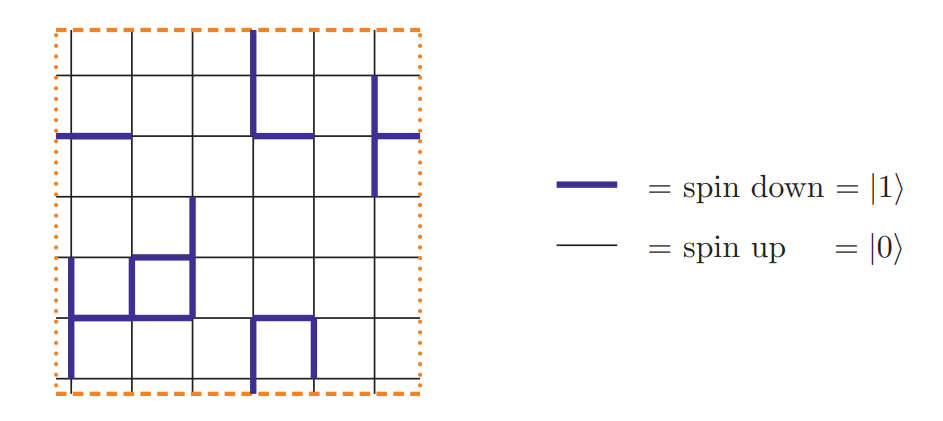

Let us create this lattice using Qiskit tools. First, we can identify qubit position by :
1. Locating a plaquette $x$ and $y$ coordinates.
2. Specifying whther the qubit is in the *left* (west) or the *bottom* (south) edge.

Notice that the upper and right edges belong to the neighbour plaquettes.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister

In [ ]:
class ToricLattice:
    """
    This class creates a toric lattice of spin qubits.

    Attributes:
    -----------
        nx      : int
        ny      : int
        circuit : "QuantumCircuit"

    Methods:
    --------
        apply_x
        apply_y
        apply_vertex_operator
    """
    def __init__(self, nx, ny):
        """
        Inputs:
        -------
            nx : Number of edges (qubits) in the x axis
            ny : Number of edges (qubits) in the y axis
        """
        self.nx = nx
        self.ny = ny
        self.qubits = {}
        for col in range(nx):
            for row in range(ny):
                self.qubits[f"left_{col}.{row}"] = QuantumRegister(size=1, name=f"left_{col}.{row}")
                self.qubits[f"down_{col}.{row}"] = QuantumRegister(size=1, name=f"down_{col}.{row}")
        self.circuit = QuantumCircuit(*self.qubits.values())

    def apply_x(self, plaquette_pos, edge):
        """
        Applies X gate on the qubit in the specific plaquette and edge.

        Inputs:
        -------
            plaquette_pos : Tuple,
                x and y coordinates
            edge          : str,
                'left' or 'down'
        """
        self.circuit.x(self.qubits[f"{edge}_{plaquette_pos[0]}.{plaquette_pos[1]}"])

    def apply_z(self, plaquette_pos, edge):
        """
        Applies Z gate on the qubit in the specific plaquette and edge.

        Inputs:
        -------
            plaquette_pos : Tuple,
                x and y coordinates
            edge          : str,
                'left' or 'down'
        """
        self.circuit.z(self.qubits[f"{edge}_{plaquette_pos[0]}.{plaquette_pos[1]}"])

    def apply_h(self, plaquette_pos, edge):
        """
        Applies Hadamard gate on the qubit in the specific plaquette and edge.

        Inputs:
        -------
            plaquette_pos : Tuple,
                x and y coordinates
            edge          : str,
                'left' or 'down'
        """
        self.circuit.h(self.qubits[f"{edge}_{plaquette_pos[0]}.{plaquette_pos[1]}"])

#### Task 1

1. Create a $4\times 4$ toric lattice
2. Initialize the qubits in the positions $[(0, 0), \text{'down'}]$, $[(0, 1), \text{'down'}]$ and $[(0, 3), \text{'down'}]$ in the $\vert 1 \rangle$ state.
3. Initialize the qubits in the positions $[(2, 0), \text{'down'}]$, $[(2, 1), \text{'down'}]$ and $[(2, 3), \text{'down'}]$ in the $\vert + \rangle$ state.

[click for our solution](D00_Toric_Code_Solutions.ipynb#task1)

<hr>

<a id="100"></a> 
## 2. Vertex and Plaquette Operators

Let us now define some simple operators on this Hilbert space of the toric lattice of qubits. We 
willneed theme to build theinteraction and the  toric code

<a id="110"></a>
### 2.1 Vertex Operators

Given a vertex $\alpha$ $\left(v_\alpha\right)$ which consists of four incident edges $ i \in v_\alpha$, we define the vertex operator as 
$$ V_{\alpha} = \prod_{i \in v_\alpha} \sigma_z^{(i)} $$

This is just the product of $\sigma_z$ applied to the four spins incident on the vertex. This operator simply counts the parity of the number of down spins (number of colored edges) incident on the vertex. It returns $+1$ if there are an even number of incident down spins at that vertex and returns $−1$ if there are an odd number, as showing in the following picture.

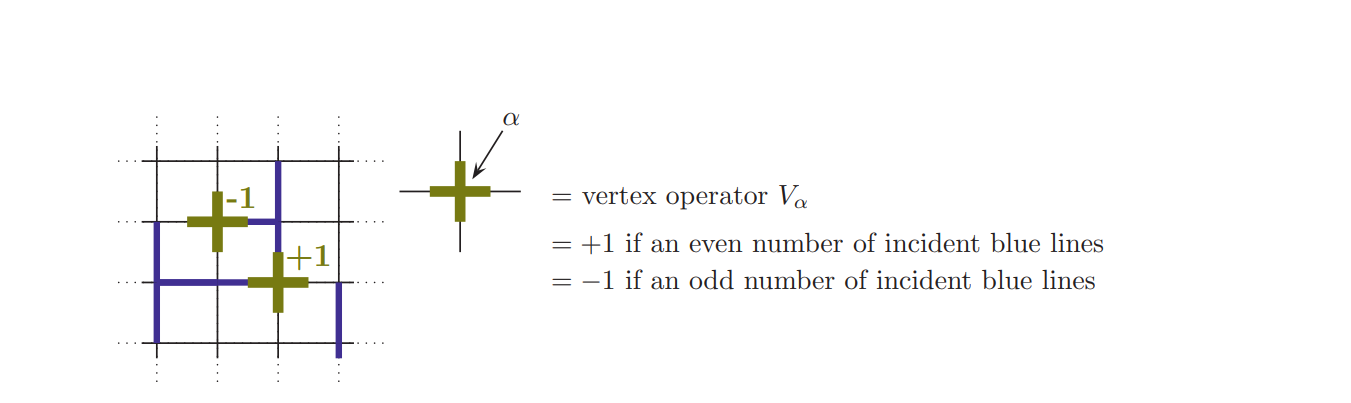

<a id="110"></a>
### 2.2 Plaquette Operators

Given a plaquette $\beta$ $\left(p_\beta\right)$ which contains four edges in a square (edge  $ i \in p_\beta$), we define the plaquette operator

$$ P_{\beta} = \prod_{i \in p_\beta} \sigma_x^{(i)} $$


which flips the (up/down) state of the spins on all of the edges of the plaquette as depicted in the picture bellow. On an $N_x$ by $N_y$ lattice, there are a total of $N_x$ $N_y$ plaquette operators.

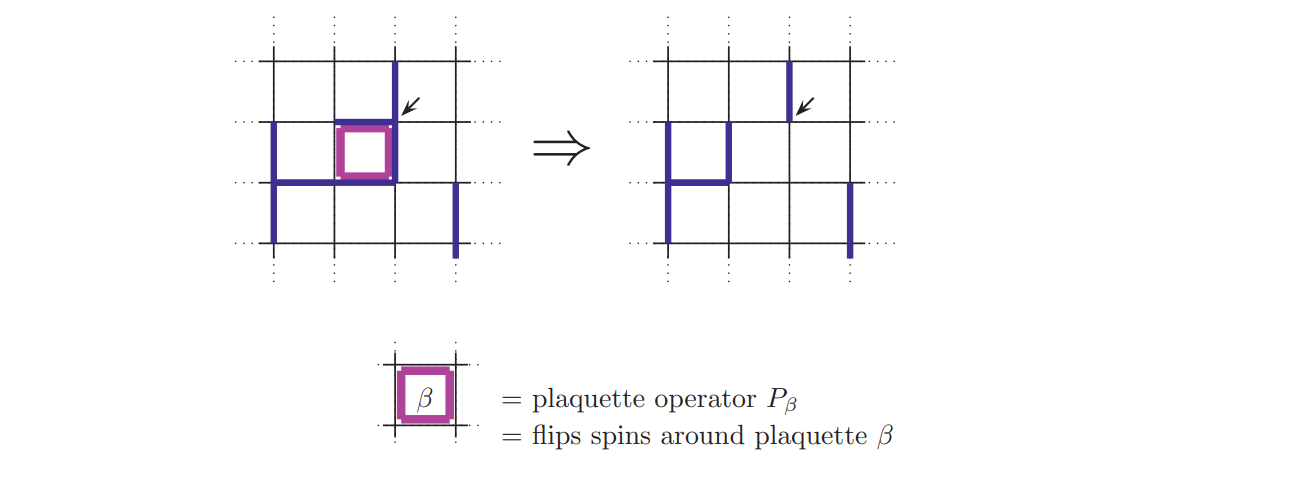

#### Task 2

- What are the eigenstates of a Plaquette operator ?

[click for our solution](D00_Toric_Code_Solutions.ipynb#task2)

#### Task 3
Show that :
- for all the $N_x$ $N_y$ plaquette operators, $$[P_{\beta},P_{\beta'}]=0$$. 
- For all the $N_x$ $N_y$ vertex operators, $$[V_{\alpha},V_{\alpha'}]=0$$.

[click for our solution](D00_Toric_Code_Solutions.ipynb#task3)

#### Is it a Complete Set of Operators?


In other words, if we specify the eigenstate of each of these operators, do we specify a unique state for the qubits?

They seem to construct a complete set since they commute with each other. However, there are two constraints:

$$\prod_{\alpha} V_{\alpha} = 1$$
$$\prod_{\beta} P_{\beta} = 1$$

This allows us to specify the eigenvalues $(\pm1)$ of $(N_x N_y −1)$ of $V_{\alpha}$ operators freely, with the value of the one remaining $V_{\alpha}$ fixed by the others.

The same applies to $P_{\beta}$.

Specifying the eigenvalues of these operators only accounts for $2(N_x N_y −1)$ binary choices.

With $2N_x N_y$ spins initially, two binary choices (two $\pm1$ degrees of freedom) remain unspecified.

These two degrees of freedom represent the two error-protected qubits in the toric code scheme for building a quantum error-correcting code. That means four logical states.

#### Task 4

Show that $[V_{\alpha},P_{\beta}]=0$ for any vertex $\alpha$ and any plaquette $\beta$.

[click for our solution](D00_Toric_Code_Solutions.ipynb#task4)

#### Task 5
Show that $A^2_𝑣 = 1$ and $B^2_p = 1$

[click for our solution](D00_Toric_Code_Solutions.ipynb#task5)

 <a id="110"></a>
### 2.3 Building the Code Space
 

Toric code is used to store quantum information protected from quantum errors and it is widely studied in quantum error correction. In order to store quantum information, we should define the code space to distinguish the legal states from unwanted states, by implementing two simple rules that define our code space. We must check to see that the two rules remain satisfied. If we find that they are not satisfied we know a physical error has occurred, the system has left the code space, and we must then go about trying to correct it.
* #### Rule 1:
  Specify that  $V_{\alpha}= 1$ for every vertex.

  If it ever finds that $V_{\alpha}= −1$ then we know we are no longer in the code space, an error has occurred that we must try to repair.
 
* #### Rule 2:
  Specify that $P_{\beta} = 1$ for every plaquette.
  
  If these operators are measured to have a −1 eigenvalue then we know an error has occurred.

**Rule 1 remains satisfied when we check Rule 2, since $[V_{\alpha},P_{\beta}]=0$**
  



#### Task 6

Show that any loop of $\sigma_x$ operations (loop of flipped qubits) does not break the Rule 1.

[click for our solution](D00_Toric_Code_Solutions.ipynb#task6)

The operators $V_{\alpha}$ and $P_{\beta} $ are known as the **stabilizers** of the code. The code space is unchanged under the application of these operators.

For constructing a wavefunction that satisfies both Rule 1 and Rule 2, 
1. The wavefunction should include clearly loops of flipped edges to satisfy Rule 1.
2. We superpose those looped configurations to satisfy Rule 2.

$$ |\psi>= \sum_{\text{All  loop  configs}} \frac{1}{\sqrt N} |\text{loop config} >  $$

$N$ is the normalization constant. By adding up all such flipped configurations, we assure that every plaquette is in the correct superpositon of flipped and unflipped and we satisfy Rule 2!

There are four independent wavefunctions of this form which differ in whether the reference configuration has an even or an odd number of blue edges going around each cycle. All of these states satisfy the constraint rules 1 and 2.

$$ \vert\psi_{ee}\rangle, \vert\psi_{eo}\rangle, \vert\psi_{oe}\rangle, \vert\psi_{oo}\rangle $$

where $e$ and $o$ means an even or an odd number of blue lines going around a given cycle.


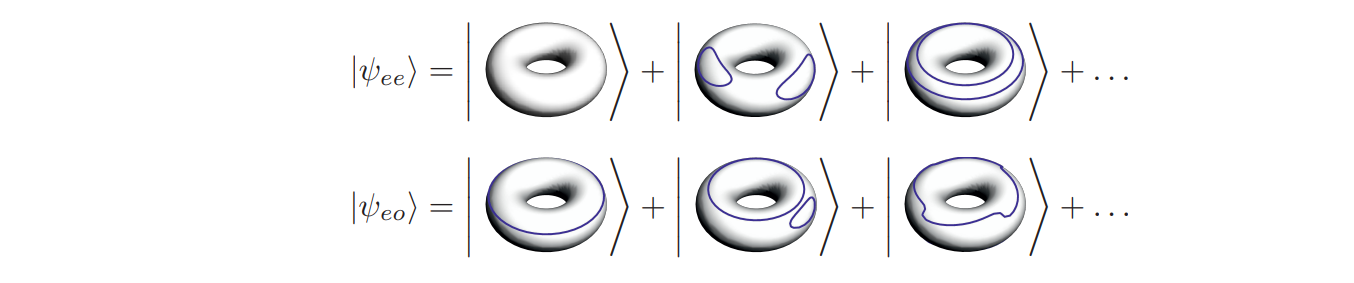

$$|\psi\rangle = \alpha|\psi_{ee}\rangle + \beta|\psi_{eo}\rangle + \gamma|\psi_{oe}\rangle + \delta|\psi_{oo}\rangle$$
with arbitrary complex coefficients $\alpha$, $\beta$, $\gamma$, $\delta$ subject to the normalization condition $|\alpha|^2 + |\beta|^2 + |\gamma|^2 + |\delta|^2 = 1$.



<a id="110"></a>
### 2.4 Errors and Error Correction

<a id="110"></a>
#### 2.4.1 $\sigma_x$ Error

 **$\Rightarrow $ Rule 1 is not satisfied**

 $\sigma_x$ is applied on edge $i$, this leads to: $ [\sigma_x,P_{\beta}] =0$ but $[\sigma_x,V_{\alpha}] \neq 0$ $\Rightarrow V_{\alpha} = -1$

To restore the ground state (code space), defects need to be brought back together to re-annihilate. $\Rightarrow $ **closed loop**. As shown in the image:

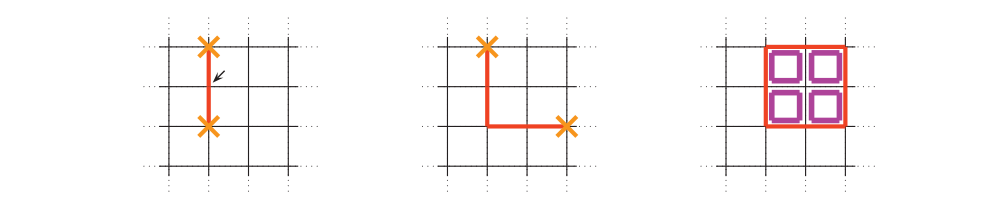

<a id="110"></a>
#### 2.4.2 $\sigma_z$ Error

 **$\Rightarrow $ Rule 1 is not satisfied**

 $\sigma_z$ is applied on edge $i$, this leads to: $[\sigma_z,P_{\beta}] \neq 0$ $\Rightarrow P_{\beta} = -1$

 To restore the ground state (code space), defects need to be brought back together to re-annihilate.$\Rightarrow $ **closed dual loop** same way as above and as shown in the image bellow:

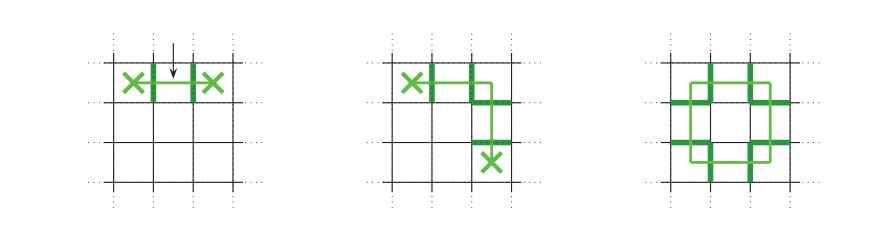

<hr>

<a id="100"></a> 
## 3. The Toric code as a fusion model of anyons

The toric code can be seen as a phas eof matter. To recast the toric code as a phase of matter, we simply write a **Hamiltanian** which is a sum of all our vertex and plaquette operators:
$$ H = − \sum_{\alpha} V_{\alpha} − \sum_{\beta} P_{\beta} $$

The lowest energy configurations or the ground states are obtained by setting all the $V_{\alpha} =+1$ and $P_{\beta}=+1$.

<a id="110"></a>
### 3.1 Excitations and Fusion Rules

**Excitations are local defects giving energy differences or errors in the language of quantum error correction where different states cannot be distinguished by local measurment**

If there are vertices with $V_{\alpha}= −1$ or plaquettes where $P_{\beta} = −1$ $\Rightarrow $ The system is not in the ground state space anymore $\Rightarrow $ Excitations or Quasiparticles.

There are three types of particles that can be found, as follows:

- The vacuum or identity particle (denoted as $I$) represents the absence of a particle.
- A vertex where $V_{\alpha} = -1$ instead of $V_{\alpha} = +1$, denoted as $e$ particle or the *electric particle*.
- A plaquette where $P_{\beta} = -1$ instead of $P_{\beta} = +1$, denoted as $m$ particle or the *magnetic particle*.
- The $f$ particle, which is the fusion or combination of the electric and magnetic particles (fusion of vertex and plaquette defects).

In the more common notation we would write the fusion rules of our excitations as:


\begin{array}{c|cccc}
\times & I & e & m & f \\
\hline
I & I & e & m & f \\
e & e & I & f & m \\
m & m & f & I & e \\
f & f & m & e & I
\end{array}

- $e, m, f, I$ form a closed set.
- There are no **non-abelian** fusion rules $\Rightarrow $ **Abelian anyons**.
- Four particle types
- Four ground states on the torus.

#### Task 7

Show that 
- $e \times e = I$
- $m \times m = I$
- $f \times f = I$

[click for our solution](D00_Toric_Code_Solutions.ipynb#task7)

<a id="110"></a>
### 3.2 Anyonic statistics

To fully study the statistics of these particles, we should examine :
1. The phase accumulated of braiding or rotating one type excitation all around other types,
   \begin{array}{c|cccc}
    \text{around} & I & e & m & f \\
    \hline
    I & 1 & 1 & 1 & 1 \\
    e & 1 & 1 & -1 & 1 \\
    m & 1 & -1 & 1 & -1 \\
    f & 1 & -1 & -1 & 1
    \end{array}
   <img src="../images/S.png" width="300" align="center"/>
   </hr>

3. The phase obtained by rotating one type of particle around itself.
   \begin{array}{c|cccc}
    \text{twist} & I & e & m & f \\
    \hline
    I & 1 & 0 & 0 & 0 \\
    e & 0 & 1 & 0 & 0 \\
    m & 0 & 0 & 1 & 0 \\
    f & 0 & 0 & 0 & -1
    \end{array}
   <img src="../images/T.png" width="300" align="center"/>

## Conclusion

1. Topological quantum codes can be employed for quantum error correction.
2. Local excitations of the topological codes exhibit anyonic behavior.
3. The toric code gives rise to abelian anyons.
4. Although toric code anyons are abelian, the topology of the torus differentiates between multiple ground states (logical states).

<a id="111"></a>
### References
- <a id="ref1"></a> [Fault-tolerant quantum computation by anyons](https://arxiv.org/abs/quant-ph/9707021)
- <a id="ref2"></a> [Eric Dennis, Alexei Kitaev, Andrew Landahl, and John Preskill. Topological quantum memory.
  Journal of Mathematical Physics, 43:4452–4505, 2002.](https://arxiv.org/abs/quant-ph/0110143)
- <a id="ref3"></a> [Paul Herringer. The Toric Code. arXiv:2207.00616v2.](https://arxiv.org/abs/2207.00616v1)
- <a id="ref4"></a> [Jiannis K . Pachos. Introduction to Topological Quantum Computation (Cambridge University
  Press). 2012.](https://arxiv.org/abs/1705.04103v1)
- <a id="ref5"></a> [Joschka Roffe. Quantum Error Correction: An Introductory Guide.](https://arxiv.org/abs/1907.11157v1)
- <a id="ref6"></a> [Steven H. Simon. Topological Quantum (Oxford University Press)](https://www-thphys.physics.ox.ac.uk/people/SteveSimon/)